In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("blood_donation_data.csv") 

# Rename columns for clarity
df.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]

# Convert target variable: 2 -> 1 (donated), 1 -> 0 (not donated)
df["Target"] = df["Target"].map({2: 1, 1: 0})

# Check dataset
print(df.head())
print(df.info())
print(df["Target"].value_counts())  # Check class balance

   Recency  Frequency  Monetary  Time  Target
0        2         50     12500    98       1
1        0         13      3250    28       1
2        1         16      4000    35       1
3        2         20      5000    45       1
4        1         24      6000    77       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
Target
0    570
1    178
Name: count, dtype: int64


In [6]:
# Split into features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluation
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Model
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       114
           1       0.57      0.11      0.19        36

    accuracy                           0.77       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.73      0.77      0.70       150



In [8]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluation
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       114
           1       0.47      0.39      0.42        36

    accuracy                           0.75       150
   macro avg       0.64      0.62      0.63       150
weighted avg       0.73      0.75      0.74       150



In [9]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation
print("XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Model
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       114
           1       0.51      0.50      0.51        36

    accuracy                           0.77       150
   macro avg       0.68      0.68      0.68       150
weighted avg       0.76      0.77      0.77       150



/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


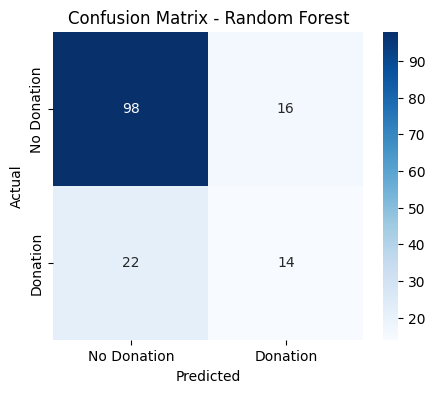

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Donation", "Donation"], yticklabels=["No Donation", "Donation"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [11]:
!pip install joblib streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [13]:
from xgboost import XGBClassifier
import joblib

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation
print("XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

joblib.dump(model_xgb, "blood_donation_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

XGBoost Model
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       114
           1       0.51      0.50      0.51        36

    accuracy                           0.77       150
   macro avg       0.68      0.68      0.68       150
weighted avg       0.76      0.77      0.77       150

Model and scaler saved successfully!


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:56:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
